In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
#from IPython.display import SVG
#from graphviz import Source 
#from IPython.display import display

In [3]:
td = pd.read_csv('C:/Users/user/Desktop/titanic/train.csv')

In [4]:
td.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
td.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
td.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
X = td.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1) #Survived мы будем предсказывать

In [8]:
y = td.Survived # ее мы убирем, чтобы предсказать 

In [9]:
X = pd.get_dummies(X) # в моем дипломе это не пригодится

In [11]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [12]:
X = X.fillna({'Age': X.Age.median()})

In [13]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [14]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [10]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [17]:
X_train.shape

(596, 10)

In [18]:
X_test.shape

(295, 10)

In [19]:
clf.score(X,y) #97% случаях мы правильно классифицировали

0.9797979797979798

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
clf.score(X_train, y_train) # точность классификации на обучающем множестве

0.9798657718120806

In [22]:
clf.score(X_test, y_test)# точность классификации на обучающем множестве, которые он не видел

0.7661016949152543

In [23]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =  3)

In [24]:
clf.fit(X_train, y_train) # обучим классификатор на train

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
clf.score(X_train, y_train) # точность классификации на обучающем множестве

0.8238255033557047

In [26]:
clf.score(X_test, y_test)

0.8203389830508474

In [27]:
max_depth_values = range(1,100)

In [28]:
scores_data = pd.DataFrame()

In [57]:
# для каждого значения глубины дерева в нашем массиве инициировать классификатор с указанной глубиной
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth =  max_depth)
    clf.fit(X_train, y_train) # обучение на train - выборке
    train_score = clf.score(X_train, y_train)# предсказывать точность классификации на train - выборке
    test_score =clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score], 'cross_val_score': [mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [58]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,NaN
0,2,0.805369,0.776271,NaN
0,3,0.823826,0.820339,NaN
0,4,0.833893,0.823729,NaN
0,5,0.840604,0.810169,NaN


In [59]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], var_name ='set_type', value_name ='score')

In [60]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
886,95,cross_val_score,0.765140
887,96,cross_val_score,0.773557
888,97,cross_val_score,0.765140
889,98,cross_val_score,0.765140


In [61]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)# не надо

,max_depth,set_type,score
594,1,cross_val_score,NaN
595,2,cross_val_score,NaN
596,3,cross_val_score,NaN
597,4,cross_val_score,NaN
598,5,cross_val_score,NaN
599,6,cross_val_score,NaN
600,7,cross_val_score,NaN
601,8,cross_val_score,NaN
602,9,cross_val_score,NaN
603,10,cross_val_score,NaN


<AxesSubplot:xlabel='max_depth', ylabel='score'>

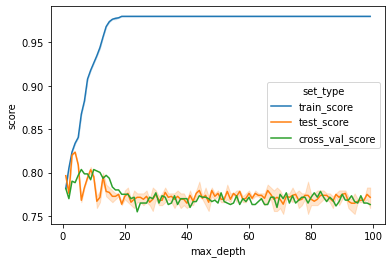

In [62]:
sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [81]:
best_clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)

In [82]:
cross_val_score(clf, X_test, y_test, cv = 5).mean()

0.7966101694915254

In [83]:
from sklearn.model_selection import GridSearchCV

In [85]:
clf = tree.DecisionTreeClassifier()#criterion = 'entropy', max_depth =  4)
clf

DecisionTreeClassifier()

In [95]:
parametrs = {'criterion': ['gini' 'entropy'], 'max_depth' : range(1,30)} 

In [96]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv = 5)

In [97]:
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['ginientropy'],
                         'max_depth': range(1, 30)})

In [99]:
grid_search_cv_clf.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [79]:
cross_val_score(clf, X_train, y_train, cv = 5) # точность которую показал наш класификатор разбив весь наш train 

array([0.75833333, 0.76470588, 0.72268908, 0.77310924, 0.75630252])

In [63]:
from sklearn.model_selection import cross_val_score

In [66]:
cross_val_score(clf, X_train, y_train, cv = 5).mean() # среднее значение

0.7886274509803922

In [70]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()